In [1]:
import os 
import numpy as np 

import networkx as nx
import matplotlib.pyplot as plt

os.chdir("..")
os.chdir("..")
from driver_folder.time_driver import TimerError 

In [2]:
T =TimerError()
T.start()
end_time = T.elapsed()
print(f"time taken:{end_time}")

time taken:1.1470001481939107e-05


In [8]:
def floydwarshall(WMat):
    
    rows, cols , x = WMat.shape 
    # transitive closure matrix 
    SP = np.full((rows,cols, cols+1),np.inf)
    infinity = np.max(WMat)*rows*rows +1 
    closure = 0 
    connection = 0 
    weight = 1 
    # for vertex in range(rows):
    #     for child in range(cols):
    #         SP[vertex,child, closure] = infinity
    
    for vertex in range(rows):
        for child in range(cols):
            if  WMat[vertex, child,connection] ==1:
                SP[vertex,child, closure] = WMat[vertex, child , weight]
    for closure_loop in range(1,cols+1):
        for vertex in range(rows):
            for child in range(cols):
                SP[vertex,child,closure_loop] = min(SP[vertex,child,closure_loop-1],
                                                    SP[vertex,closure_loop-1,closure_loop-1]+
                                                    SP[closure_loop-1,child,closure_loop-1])
    return SP[:,:,cols]

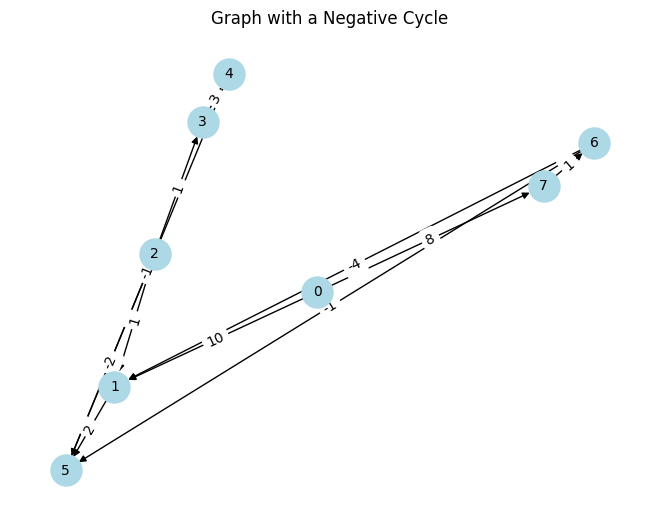

In [9]:

# Number of nodes
num_nodes = 8

# Initialize adjacency matrix with inf (representing no connection)
adj_matrix = np.zeros((num_nodes, num_nodes, 2))

# Define the edges and their weights
edges = [
    (0, 1, 10),
    (0, 7, 8),
    (1, 5, 2),
    (2, 1, 1),
    (2, 3, 1),
    (3, 4, 3),
    (4, 5, -1),
    (5, 2, -2),
    (6, 1, -4),
    (6, 5, -1),
    (7, 6, 1),
]

# Fill the adjacency matrix with the edge weights
for edge in edges:
    u, v, weight = edge
    adj_matrix[u, v] = [1,weight]

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges with weights to the graph
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, arrows=True)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Graph with a Negative Cycle")
plt.show()


In [10]:
distance = floydwarshall(adj_matrix)

In [11]:
distance

array([[inf,  5.,  5.,  6.,  9.,  7.,  9.,  8.],
       [inf,  1.,  0.,  1.,  4.,  2., inf, inf],
       [inf,  1.,  1.,  1.,  4.,  3., inf, inf],
       [inf,  1.,  0.,  1.,  3.,  2., inf, inf],
       [inf, -2., -3., -2.,  1., -1., inf, inf],
       [inf, -1., -2., -1.,  2.,  1., inf, inf],
       [inf, -4., -4., -3.,  0., -2., inf, inf],
       [inf, -3., -3., -2.,  1., -1.,  1., inf]])